In [1]:
from ultralytics import YOLO
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import shutil
import os
import pathlib
from dotenv import load_dotenv
import torch
import cv2

In [2]:
load_dotenv();
PWD = pathlib.Path(os.getenv('COW_DETECT_PWD'))

In [23]:
IMGPATH = PWD.joinpath('imgs')

In [24]:
images = os.listdir(IMGPATH.joinpath('images'))
labels = os.listdir(IMGPATH.joinpath('labels'))

#### Lol cleaning

In [12]:
faults = []
for idx, label in enumerate(labels):
    with open(IMGPATH.joinpath('labels', label)) as f:
        lines = [l.rstrip().split() for l in f]
        # rects = [list(map(float, i)) for i in lines]
        for line in lines:
            if line[0] != '0' or len(line) != 5:
                faults.append(idx)
                break



In [13]:
REDO_PATH = PWD.joinpath('redo')
REDO_IMGS = REDO_PATH.joinpath('images')
REDO_LBLS = REDO_PATH.joinpath('labels')

In [14]:
os.mkdir(REDO_PATH)
os.mkdir(REDO_IMGS)
os.mkdir(REDO_LBLS)

In [15]:
for faultIdx in faults:
    shutil.move(
        IMGPATH.joinpath('images', images[faultIdx]),
        REDO_IMGS.joinpath(images[faultIdx])
    )
    
    shutil.move(
        IMGPATH.joinpath('labels', labels[faultIdx]),
        REDO_LBLS.joinpath(labels[faultIdx])
    )

#### Separation

In [29]:
trainImages, testImages, trainLabels, testLabels = train_test_split(
    images, labels, 
    test_size=0.2, random_state=69, shuffle=True
)

trainImages, valImages, trainLabels, valLabels = train_test_split(
    trainImages, trainLabels, test_size=0.25, random_state=69
) # 0.25 x 0.8 = 0.2

In [27]:
def MoveImages(imgs, labls, to='train'):
    os.mkdir(PWD.joinpath(to))
    os.mkdir(PWD.joinpath(to,'images'))
    os.mkdir(PWD.joinpath(to,'labels'))

    NEWPATH = PWD.joinpath(to)

    print(f'Moving to {to}')

    for idx, image in enumerate(imgs):
        shutil.move(
            IMGPATH.joinpath('images', image),
            NEWPATH.joinpath('images', image)
        )

        shutil.move(
            IMGPATH.joinpath('labels', labls[idx]),
            NEWPATH.joinpath('labels', labls[idx])
        )
    

In [31]:
MoveImages(trainImages, trainLabels, to='train')
MoveImages(valImages, valLabels, to='valid')
MoveImages(testImages, testLabels, to='test')

Moving to train
Moving to valid
Moving to test


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
model = YOLO('yolov8n.pt')
model.to(device);

In [5]:
model.train(data=PWD.joinpath('data.yaml'))

New https://pypi.org/project/ultralytics/8.3.21 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:\Dev\Datasets\YoloCows\data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

train: Scanning D:\Dev\Datasets\YoloCows\train\labels.cache... 4394 images, 299 backgrounds, 0 corrupt: 100%|██████████| 4394/4394 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


C:\Users\Peblo\AppData\Roaming\Python\Python310\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.19 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning D:\Dev\Datasets\YoloCows\valid\labels.cache... 1465 images, 102 backgrounds, 0 corrupt: 100%|██████████| 1465/1465 [00:00<?, ?it/s]


Plotting labels to runs\detect\train8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train8
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.25G      0.974       1.14      1.231         62        640: 100%|██████████| 275/275 [00:47<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:09<00:00,  4.94it/s]


                   all       1465       5780      0.905      0.901      0.953      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.25G     0.9661     0.8514      1.218        109        640: 100%|██████████| 275/275 [00:42<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.37it/s]


                   all       1465       5780      0.893      0.867      0.935      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.22G     0.9598     0.7925      1.214         74        640: 100%|██████████| 275/275 [00:40<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.20it/s]


                   all       1465       5780      0.899      0.902      0.946      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.21G     0.9427     0.7476      1.207         88        640: 100%|██████████| 275/275 [00:40<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.35it/s]


                   all       1465       5780      0.919      0.897      0.951      0.735

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.22G     0.9155      0.718      1.192        130        640: 100%|██████████| 275/275 [00:40<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.33it/s]

                   all       1465       5780      0.933      0.906      0.964      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.22G      0.887     0.6895      1.181        108        640: 100%|██████████| 275/275 [00:40<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.22it/s]

                   all       1465       5780      0.925      0.923      0.967      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.21G     0.8624     0.6594      1.167         76        640: 100%|██████████| 275/275 [00:39<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.22it/s]


                   all       1465       5780      0.926      0.916      0.963      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       2.2G     0.8582     0.6495      1.162        100        640: 100%|██████████| 275/275 [00:39<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.44it/s]


                   all       1465       5780      0.932       0.92      0.968      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.21G     0.8455     0.6362      1.159         88        640: 100%|██████████| 275/275 [00:40<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.40it/s]


                   all       1465       5780       0.93      0.925      0.969      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.21G     0.8362     0.6341      1.156         87        640: 100%|██████████| 275/275 [00:40<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.24it/s]

                   all       1465       5780      0.939      0.922       0.97      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.21G     0.8124      0.614      1.143         71        640: 100%|██████████| 275/275 [00:40<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.36it/s]


                   all       1465       5780      0.935      0.928      0.968      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.24G     0.8156     0.6154      1.145         93        640: 100%|██████████| 275/275 [00:39<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.18it/s]


                   all       1465       5780      0.925      0.934      0.969      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.22G     0.8047     0.6025      1.138         77        640: 100%|██████████| 275/275 [00:40<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:09<00:00,  5.11it/s]


                   all       1465       5780      0.935       0.93      0.972      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.22G     0.8008     0.5983      1.133         60        640: 100%|██████████| 275/275 [00:40<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.30it/s]

                   all       1465       5780      0.928      0.922      0.968      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.21G     0.7882     0.5855      1.128         85        640: 100%|██████████| 275/275 [00:40<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.40it/s]

                   all       1465       5780      0.939      0.925      0.968      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       2.2G      0.776     0.5782      1.122         53        640: 100%|██████████| 275/275 [00:40<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.27it/s]

                   all       1465       5780      0.945      0.931      0.975      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.21G     0.7804     0.5746      1.127         97        640: 100%|██████████| 275/275 [00:40<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.20it/s]

                   all       1465       5780      0.935      0.929      0.971        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.25G     0.7636     0.5621      1.118         68        640: 100%|██████████| 275/275 [00:40<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.26it/s]

                   all       1465       5780      0.933      0.937      0.969      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.17G     0.7692     0.5654      1.122        100        640: 100%|██████████| 275/275 [00:40<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.35it/s]


                   all       1465       5780      0.936       0.94      0.974      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.2G     0.7608     0.5581      1.114         81        640: 100%|██████████| 275/275 [00:40<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.28it/s]

                   all       1465       5780      0.934      0.943      0.974        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.26G     0.7579      0.561      1.118         61        640: 100%|██████████| 275/275 [00:40<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.29it/s]


                   all       1465       5780      0.941      0.939      0.976      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.22G     0.7531     0.5491      1.111         90        640: 100%|██████████| 275/275 [00:39<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.44it/s]

                   all       1465       5780      0.939      0.933      0.974      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.21G     0.7514     0.5573      1.112         84        640: 100%|██████████| 275/275 [00:40<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.29it/s]

                   all       1465       5780      0.931      0.944      0.976      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.24G     0.7395     0.5395      1.104         92        640: 100%|██████████| 275/275 [00:39<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.25it/s]


                   all       1465       5780       0.94      0.937      0.971      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.23G      0.733     0.5409        1.1         87        640: 100%|██████████| 275/275 [00:40<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.44it/s]


                   all       1465       5780       0.94      0.938      0.973      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.21G     0.7386     0.5453      1.103         96        640: 100%|██████████| 275/275 [00:40<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.48it/s]

                   all       1465       5780      0.926      0.953      0.977      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.24G     0.7315     0.5373      1.101         91        640: 100%|██████████| 275/275 [00:40<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.11it/s]

                   all       1465       5780      0.939       0.94      0.976       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.23G     0.7307     0.5376      1.105         96        640: 100%|██████████| 275/275 [00:40<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.28it/s]

                   all       1465       5780      0.937      0.945      0.976      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.22G     0.7214       0.53      1.092        135        640: 100%|██████████| 275/275 [00:39<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.45it/s]


                   all       1465       5780      0.934       0.94      0.975       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.23G     0.7235     0.5258      1.097         96        640: 100%|██████████| 275/275 [00:40<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.29it/s]

                   all       1465       5780      0.943      0.941      0.977      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.21G     0.7163     0.5179       1.09         80        640: 100%|██████████| 275/275 [00:40<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.13it/s]

                   all       1465       5780      0.942      0.946      0.978      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.23G     0.7182     0.5187       1.09         80        640: 100%|██████████| 275/275 [00:40<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.34it/s]

                   all       1465       5780      0.947      0.939      0.978      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.22G     0.7212     0.5165      1.091        100        640: 100%|██████████| 275/275 [00:39<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.34it/s]

                   all       1465       5780      0.936      0.949      0.977      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.26G     0.7016     0.5092      1.082         76        640: 100%|██████████| 275/275 [00:40<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.26it/s]

                   all       1465       5780      0.935      0.951      0.979       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.21G     0.7124     0.5116      1.086         76        640: 100%|██████████| 275/275 [00:40<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.27it/s]

                   all       1465       5780      0.945      0.942      0.979       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.21G     0.6967     0.5016      1.082         90        640: 100%|██████████| 275/275 [00:40<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.38it/s]

                   all       1465       5780      0.947      0.946      0.978      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.25G     0.7011     0.5002       1.08         65        640: 100%|██████████| 275/275 [00:39<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.41it/s]

                   all       1465       5780      0.944      0.941      0.978      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.21G     0.7002     0.5016       1.08         98        640: 100%|██████████| 275/275 [00:39<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.25it/s]

                   all       1465       5780      0.944      0.946      0.979      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.21G     0.6953     0.5049      1.078         98        640: 100%|██████████| 275/275 [00:40<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.43it/s]

                   all       1465       5780      0.944      0.939      0.979      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.2G     0.6861      0.494      1.072         75        640: 100%|██████████| 275/275 [00:39<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.44it/s]

                   all       1465       5780       0.94      0.939      0.979      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.26G     0.6901     0.4918      1.077         79        640: 100%|██████████| 275/275 [00:40<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.26it/s]

                   all       1465       5780      0.932      0.955      0.979      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       2.2G      0.686     0.4893      1.071         98        640: 100%|██████████| 275/275 [00:40<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.42it/s]

                   all       1465       5780      0.939      0.948      0.979      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.21G     0.6829     0.4894      1.072         79        640: 100%|██████████| 275/275 [00:40<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.43it/s]

                   all       1465       5780      0.943      0.947       0.98      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.23G      0.679     0.4892      1.073         67        640: 100%|██████████| 275/275 [00:39<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.47it/s]

                   all       1465       5780      0.949      0.944       0.98      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.21G     0.6692     0.4774      1.064         60        640: 100%|██████████| 275/275 [00:40<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.28it/s]

                   all       1465       5780      0.943      0.948      0.978      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.22G     0.6778     0.4857      1.067         85        640: 100%|██████████| 275/275 [00:40<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.37it/s]

                   all       1465       5780      0.936      0.952       0.98       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.21G     0.6716     0.4782      1.067         95        640: 100%|██████████| 275/275 [00:40<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.40it/s]

                   all       1465       5780      0.936      0.954       0.98       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.23G     0.6629     0.4783       1.06        100        640: 100%|██████████| 275/275 [00:39<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.34it/s]

                   all       1465       5780      0.946      0.944       0.98      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.22G     0.6655     0.4738      1.062         62        640: 100%|██████████| 275/275 [00:40<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.34it/s]

                   all       1465       5780      0.935      0.956      0.979      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.21G     0.6636     0.4733      1.064         74        640: 100%|██████████| 275/275 [00:40<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.42it/s]

                   all       1465       5780      0.942      0.951       0.98      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       2.2G     0.6599     0.4727      1.063         83        640: 100%|██████████| 275/275 [00:39<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.19it/s]

                   all       1465       5780      0.943      0.948       0.98      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.21G     0.6608     0.4684       1.06         78        640: 100%|██████████| 275/275 [00:41<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.16it/s]

                   all       1465       5780      0.941      0.953       0.98      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.21G     0.6555     0.4661      1.057        111        640: 100%|██████████| 275/275 [00:42<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:09<00:00,  5.02it/s]

                   all       1465       5780      0.934      0.956      0.979       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.21G     0.6551     0.4624      1.058         78        640: 100%|██████████| 275/275 [00:46<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:09<00:00,  5.00it/s]

                   all       1465       5780      0.943       0.95       0.98      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.24G     0.6436     0.4616      1.054         80        640: 100%|██████████| 275/275 [00:40<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:09<00:00,  4.92it/s]

                   all       1465       5780      0.943      0.951       0.98      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.23G     0.6542     0.4624      1.061         87        640: 100%|██████████| 275/275 [00:42<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:09<00:00,  5.09it/s]

                   all       1465       5780      0.944      0.952      0.981      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.21G       0.64     0.4562       1.05         83        640: 100%|██████████| 275/275 [00:41<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:09<00:00,  4.84it/s]

                   all       1465       5780      0.943      0.949      0.979      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.21G     0.6417     0.4552      1.052         92        640: 100%|██████████| 275/275 [00:41<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:09<00:00,  5.09it/s]

                   all       1465       5780      0.946       0.95      0.981      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.24G     0.6378     0.4492      1.052         96        640: 100%|██████████| 275/275 [00:40<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.34it/s]

                   all       1465       5780      0.941      0.952      0.981      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.24G     0.6446     0.4533      1.053         89        640: 100%|██████████| 275/275 [00:40<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.41it/s]

                   all       1465       5780       0.94      0.954      0.981      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.22G     0.6384     0.4489       1.05        126        640: 100%|██████████| 275/275 [00:40<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.66it/s]

                   all       1465       5780      0.947       0.95      0.981       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.22G     0.6376     0.4513      1.051         93        640: 100%|██████████| 275/275 [00:39<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.58it/s]

                   all       1465       5780      0.948      0.945      0.981      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.2G     0.6348     0.4506      1.048        111        640: 100%|██████████| 275/275 [00:39<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.60it/s]

                   all       1465       5780      0.949      0.943      0.981      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       2.2G     0.6308     0.4464      1.044         82        640: 100%|██████████| 275/275 [00:40<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.64it/s]

                   all       1465       5780      0.947      0.951      0.982      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.25G     0.6272     0.4422      1.045         74        640: 100%|██████████| 275/275 [00:39<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.54it/s]

                   all       1465       5780      0.945      0.951      0.981      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.21G     0.6275     0.4446      1.044        110        640: 100%|██████████| 275/275 [00:39<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.51it/s]

                   all       1465       5780      0.941      0.951      0.981      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       2.2G      0.623     0.4414       1.04        109        640: 100%|██████████| 275/275 [00:39<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.67it/s]

                   all       1465       5780      0.948      0.948      0.982      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       2.2G     0.6172     0.4364      1.038        111        640: 100%|██████████| 275/275 [00:39<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.67it/s]

                   all       1465       5780      0.946      0.952      0.981       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.19G     0.6227     0.4382      1.038         78        640: 100%|██████████| 275/275 [00:40<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.57it/s]

                   all       1465       5780      0.944      0.957      0.982      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.21G     0.6146     0.4319      1.037         92        640: 100%|██████████| 275/275 [00:39<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.61it/s]

                   all       1465       5780       0.94      0.955      0.981      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.24G      0.616     0.4325      1.038         88        640: 100%|██████████| 275/275 [00:39<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.63it/s]

                   all       1465       5780      0.946      0.952      0.982      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       2.2G     0.6092     0.4287      1.033         66        640: 100%|██████████| 275/275 [00:39<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.55it/s]

                   all       1465       5780      0.946      0.952      0.983      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.22G      0.608      0.428      1.034         90        640: 100%|██████████| 275/275 [00:40<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.58it/s]

                   all       1465       5780      0.941      0.952      0.982      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.21G     0.6029      0.424      1.032        110        640: 100%|██████████| 275/275 [00:39<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.71it/s]

                   all       1465       5780      0.942      0.956      0.982       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       2.2G     0.6026     0.4248      1.033         67        640: 100%|██████████| 275/275 [00:39<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.15it/s]

                   all       1465       5780      0.942      0.959      0.982      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.25G     0.6035     0.4233      1.034         62        640: 100%|██████████| 275/275 [00:40<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.63it/s]

                   all       1465       5780      0.945      0.953      0.982      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.22G     0.5946     0.4163      1.025         72        640: 100%|██████████| 275/275 [00:40<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.67it/s]

                   all       1465       5780       0.94      0.955      0.981      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.21G     0.5991     0.4197       1.03        112        640: 100%|██████████| 275/275 [00:39<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.61it/s]

                   all       1465       5780      0.946      0.953      0.981      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       2.2G     0.5991     0.4218       1.03         90        640: 100%|██████████| 275/275 [00:39<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.59it/s]

                   all       1465       5780      0.944      0.954      0.981      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       2.2G     0.5921     0.4133      1.027         97        640: 100%|██████████| 275/275 [00:39<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.62it/s]

                   all       1465       5780      0.947       0.95      0.983      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.23G     0.5908      0.411      1.023         70        640: 100%|██████████| 275/275 [00:39<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.62it/s]

                   all       1465       5780       0.95       0.95      0.982      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.22G      0.588     0.4095      1.022         72        640: 100%|██████████| 275/275 [00:39<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.52it/s]

                   all       1465       5780      0.949      0.947      0.981      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.21G      0.589     0.4073      1.023         94        640: 100%|██████████| 275/275 [00:39<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.66it/s]

                   all       1465       5780      0.948       0.95      0.982      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.25G     0.5859     0.4073      1.023        108        640: 100%|██████████| 275/275 [00:39<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.74it/s]

                   all       1465       5780       0.95       0.95      0.982      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.22G     0.5814     0.4067       1.02        101        640: 100%|██████████| 275/275 [00:40<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.60it/s]

                   all       1465       5780      0.947      0.952      0.982      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.25G     0.5831     0.4032      1.021         73        640: 100%|██████████| 275/275 [00:39<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.64it/s]

                   all       1465       5780      0.951      0.951      0.982      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       2.2G     0.5782     0.4004      1.019         72        640: 100%|██████████| 275/275 [00:39<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.65it/s]

                   all       1465       5780      0.948      0.952      0.981      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.26G     0.5794     0.4018      1.022         83        640: 100%|██████████| 275/275 [00:39<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.59it/s]

                   all       1465       5780      0.949      0.951      0.982      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.21G     0.5792     0.3982      1.018         87        640: 100%|██████████| 275/275 [00:39<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.70it/s]

                   all       1465       5780      0.946      0.951      0.981      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.22G     0.5767     0.3988      1.021         72        640: 100%|██████████| 275/275 [00:39<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.55it/s]

                   all       1465       5780      0.946      0.953      0.982      0.843


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       2.2G     0.5443      0.348     0.9986         30        640: 100%|██████████| 275/275 [00:39<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.76it/s]

                   all       1465       5780      0.954      0.942      0.981      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.2G      0.528     0.3348     0.9876         46        640: 100%|██████████| 275/275 [00:38<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.83it/s]

                   all       1465       5780      0.947      0.948      0.981      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.19G     0.5238     0.3321     0.9859         43        640: 100%|██████████| 275/275 [00:38<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.77it/s]

                   all       1465       5780      0.946      0.951      0.982      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.2G     0.5217     0.3272     0.9825         43        640: 100%|██████████| 275/275 [00:38<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.79it/s]

                   all       1465       5780      0.947      0.951      0.981      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       2.2G     0.5131     0.3217     0.9781         28        640: 100%|██████████| 275/275 [00:38<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.87it/s]

                   all       1465       5780       0.95      0.948      0.981      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.21G     0.5091     0.3161     0.9768         38        640: 100%|██████████| 275/275 [00:38<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.76it/s]

                   all       1465       5780       0.95      0.949      0.981      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.21G     0.5089     0.3187     0.9802         38        640: 100%|██████████| 275/275 [00:38<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.76it/s]

                   all       1465       5780      0.948       0.95      0.981      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       2.2G     0.5039     0.3137     0.9777         37        640: 100%|██████████| 275/275 [00:38<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  5.78it/s]

                   all       1465       5780      0.948       0.95      0.981      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.17G     0.5042     0.3156     0.9765         46        640: 100%|██████████| 275/275 [00:38<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.51it/s]

                   all       1465       5780      0.946      0.954      0.982      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       2.2G     0.5031      0.315     0.9725         39        640: 100%|██████████| 275/275 [00:38<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:08<00:00,  5.73it/s]

                   all       1465       5780      0.947      0.952      0.982      0.843



100 epochs completed in 1.378 hours.
Optimizer stripped from runs\detect\train8\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train8\weights\best.pt, 6.2MB

Validating runs\detect\train8\weights\best.pt...
Ultralytics YOLOv8.2.102  Python-3.10.0 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]


                   all       1465       5780      0.947      0.952      0.982      0.844
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000016BC4412B60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

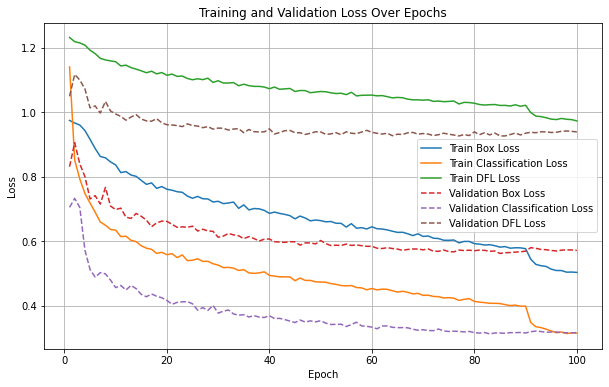

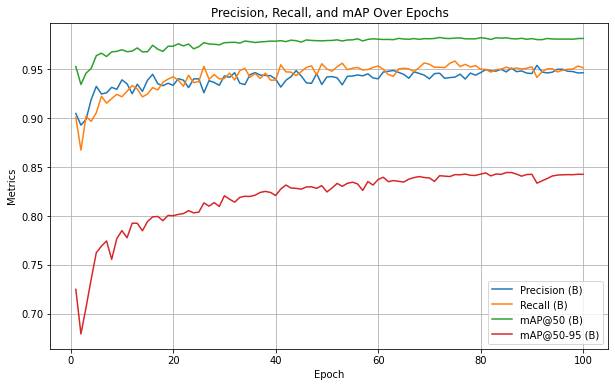

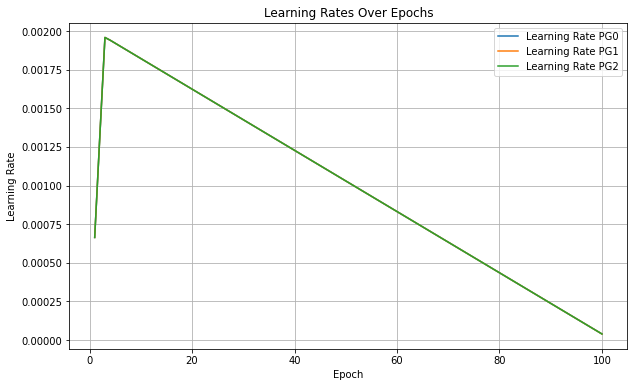

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


results = pd.read_csv(pathlib.Path('./runs/detect/train8/results.csv')) 
results.columns = results.columns.str.strip()

plt.figure(figsize=(10, 6))
plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss')
plt.plot(results['epoch'], results['train/cls_loss'], label='Train Classification Loss')
plt.plot(results['epoch'], results['train/dfl_loss'], label='Train DFL Loss')
plt.plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss', linestyle='--')
plt.plot(results['epoch'], results['val/cls_loss'], label='Validation Classification Loss', linestyle='--')
plt.plot(results['epoch'], results['val/dfl_loss'], label='Validation DFL Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(results['epoch'], results['metrics/precision(B)'], label='Precision (B)')
plt.plot(results['epoch'], results['metrics/recall(B)'], label='Recall (B)')
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@50 (B)')
plt.plot(results['epoch'], results['metrics/mAP50-95(B)'], label='mAP@50-95 (B)')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.title('Precision, Recall, and mAP Over Epochs')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(results['epoch'], results['lr/pg0'], label='Learning Rate PG0')
plt.plot(results['epoch'], results['lr/pg1'], label='Learning Rate PG1')
plt.plot(results['epoch'], results['lr/pg2'], label='Learning Rate PG2')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rates Over Epochs')
plt.legend()
plt.grid()
plt.show()

In [8]:
model.export()

Ultralytics YOLOv8.2.102  Python-3.10.0 torch-2.5.0+cu124 CPU (AMD Ryzen 5 3600 6-Core Processor)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs\detect\train8\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.9 MB)

TorchScript: starting export with torch 2.5.0+cu124...
TorchScript: export success  1.8s, saved as 'runs\detect\train8\weights\best.torchscript' (11.9 MB)

Export complete (2.2s)
Results saved to C:\Dev\LauCows\notebooks\runs\detect\train8\weights
Predict:         yolo predict task=detect model=runs\detect\train8\weights\best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs\detect\train8\weights\best.torchscript imgsz=640 data=D:\Dev\Datasets\YoloCows\data.yaml  
Visualize:       https://netron.app


'runs\\detect\\train8\\weights\\best.torchscript'

In [12]:
image = cv2.imread('..\\testimgs\\img02.jpg')

In [13]:
preds = model.predict(image)


0: 384x640 6 cows, 29.5ms
Speed: 38.5ms preprocess, 29.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


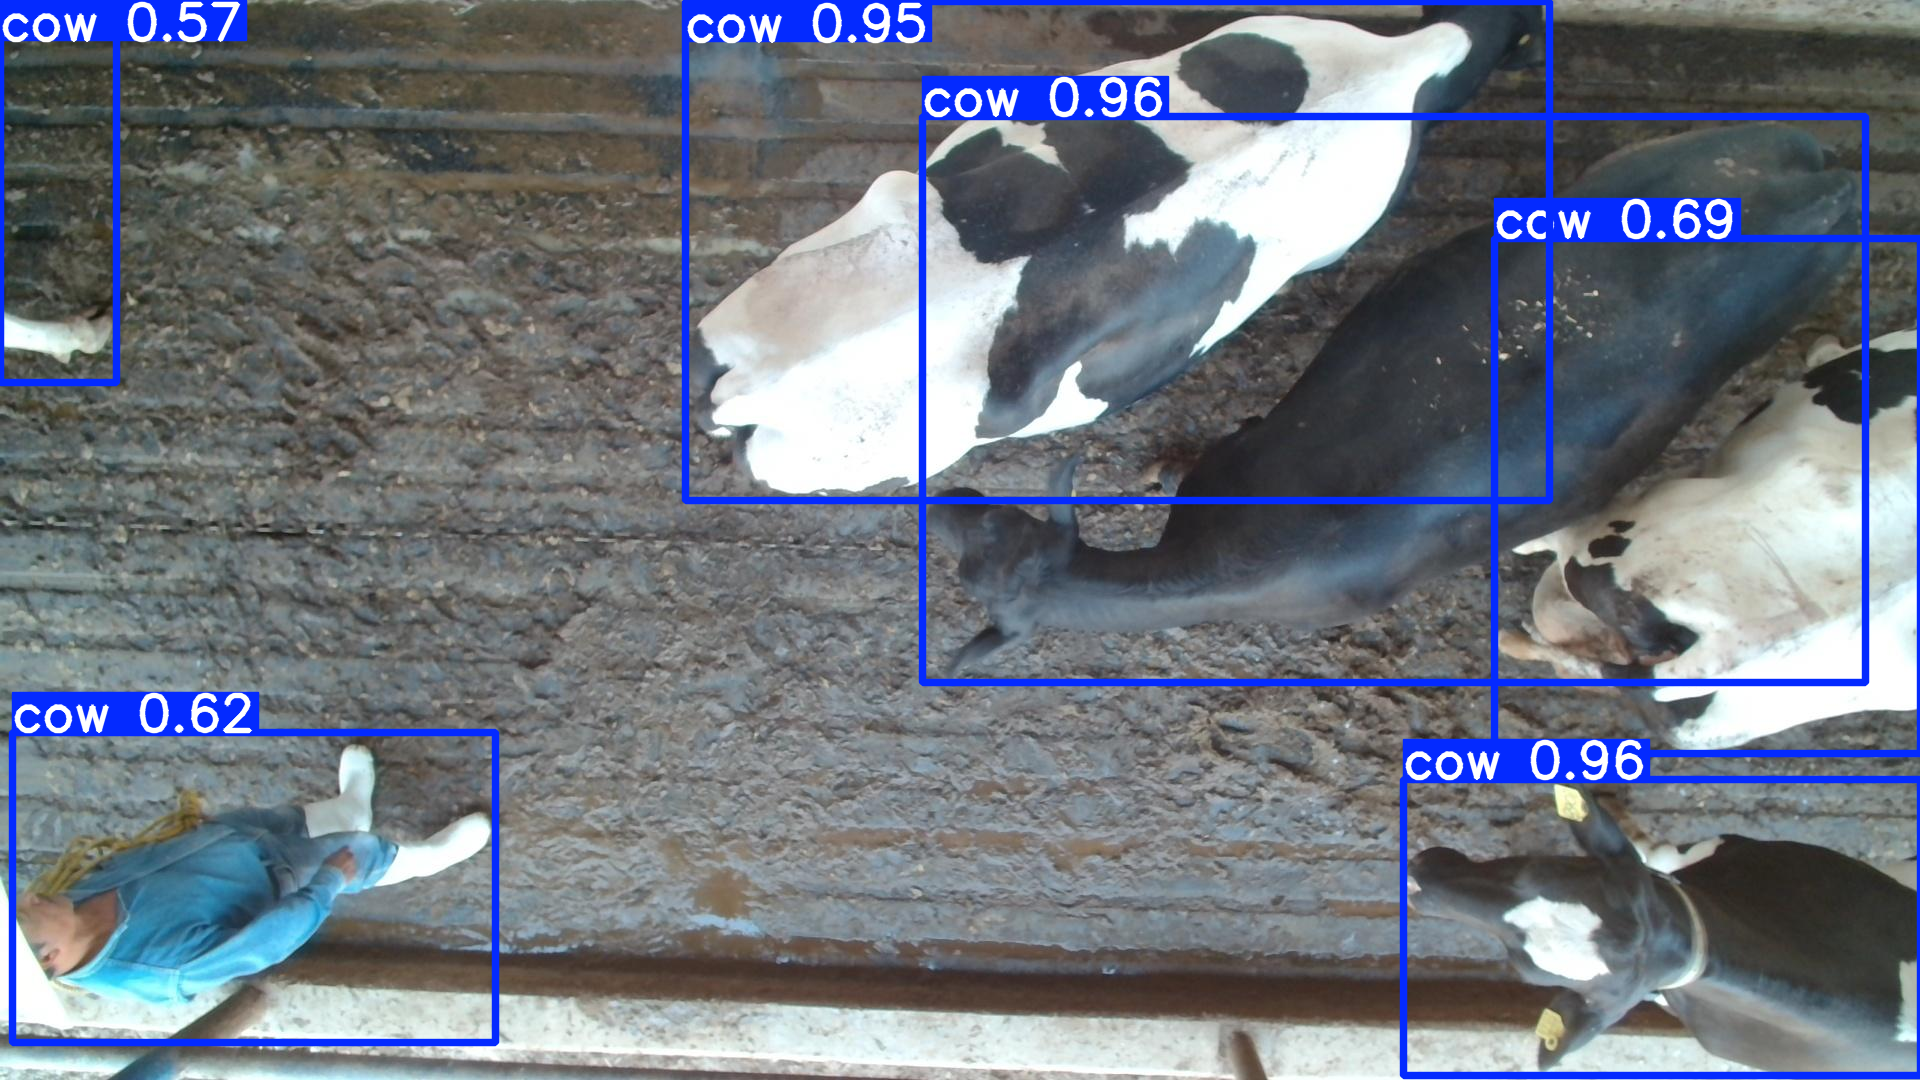

In [14]:
plot = preds[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))